## Conversion csv to npz graph file

In [99]:
import networkx as nx
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd

In [100]:
import os
os.getcwd()

'c:\\Users\\nino\\Desktop\\Python\\ThesisFinal'

This dataset contains house sale prices for King County, which includes **Seattle**. It includes homes sold between May 2014 and May 2015.
 - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [101]:
df = pd.read_csv('kc_house_data.csv')

In [102]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [104]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Convert datetime

In [105]:
df["date"]

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [106]:
df["date"] = pd.to_datetime(df["date"])
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [107]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

In [108]:
df = df.drop(["date"], axis=1)
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,5,21
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,2,23
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014,6,23
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015,1,16


In [109]:
df["index"] = df.index
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,index
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,3
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,2014,5,21,21608
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,2015,2,23,21609
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,98144,47.5944,-122.299,1020,2007,2014,6,23,21610
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,98027,47.5345,-122.069,1410,1287,2015,1,16,21611


Subsample of dataset based on zipcode

In [110]:
df["zipcode"].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

The zipcode 98103 is Seattle, Washington.

The zipcode 98038 is Maple Valley, Washington

In [111]:
zip_values = ['98103', '98038']
df = df[df['zipcode'].isin(zip_values)]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,index
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,0,3,...,0,98038,47.3684,-122.031,2390,7570,2015,3,12,9
17,6865200140,485000.0,4,1.00,1600,4300,1.5,0,0,4,...,0,98103,47.6648,-122.343,1610,4300,2014,5,29,17
73,5416510140,360000.0,4,2.50,2380,5000,2.0,0,0,3,...,0,98038,47.3608,-122.036,2420,5000,2014,7,10,73
80,5104520400,390000.0,3,2.50,2350,5100,2.0,0,0,3,...,0,98038,47.3512,-122.008,2350,5363,2014,12,2,80
81,7437100340,360000.0,4,2.50,1900,5889,2.0,0,0,3,...,0,98038,47.3490,-122.031,1870,6405,2014,12,22,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,1931300090,610950.0,3,3.00,1680,1570,3.0,0,0,3,...,0,98103,47.6572,-122.346,1640,4800,2014,5,7,21574
21589,7570050450,347500.0,3,2.50,2540,4760,2.0,0,0,3,...,0,98038,47.3452,-122.022,2540,4571,2014,9,10,21589
21592,1931300412,475000.0,3,2.25,1190,1200,3.0,0,0,3,...,0,98103,47.6542,-122.346,1180,1224,2015,4,16,21592
21595,1972201967,520000.0,2,2.25,1530,981,3.0,0,0,3,...,0,98103,47.6533,-122.346,1530,1282,2014,10,31,21595


## MinMaxScaler

In [112]:
#The embedding model seems only to work when the values are in [0,1]. Need to check if it also works with a standardscaler and normalizer.
from sklearn.preprocessing import MinMaxScaler 
excluded_cols = ["id", "price", "lat", "long","index", "zipcode"]
cols_to_scale = [col for col in df.columns if col not in excluded_cols]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

c:\Users\nino\anaconda4\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\nino\anaconda4\envs\myenv\lib\site-packages\pandas\core\indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [92]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,index
9,3793500160,323000.0,0.090909,0.411765,0.309917,0.009483,0.4,0.0,0.0,0.50,...,0.0,0.0,47.3684,-122.031,0.497076,0.028580,1.0,0.181818,0.366667,9
17,6865200140,485000.0,0.121212,0.058824,0.250000,0.005856,0.2,0.0,0.0,0.75,...,0.0,1.0,47.6648,-122.343,0.269006,0.014299,0.0,0.363636,0.933333,17
73,5416510140,360000.0,0.121212,0.411765,0.411157,0.006979,0.4,0.0,0.0,0.50,...,0.0,0.0,47.3608,-122.036,0.505848,0.017356,0.0,0.545455,0.300000,73
80,5104520400,390000.0,0.090909,0.411765,0.404959,0.007140,0.4,0.0,0.0,0.50,...,0.0,0.0,47.3512,-122.008,0.485380,0.018941,0.0,1.000000,0.033333,80
81,7437100340,360000.0,0.121212,0.411765,0.311983,0.008406,0.4,0.0,0.0,0.50,...,0.0,0.0,47.3490,-122.031,0.345029,0.023492,0.0,1.000000,0.700000,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,1931300090,610950.0,0.090909,0.529412,0.266529,0.001475,0.8,0.0,0.0,0.50,...,0.0,1.0,47.6572,-122.346,0.277778,0.016483,0.0,0.363636,0.200000,21574
21589,7570050450,347500.0,0.090909,0.411765,0.444215,0.006594,0.4,0.0,0.0,0.50,...,0.0,0.0,47.3452,-122.022,0.540936,0.015482,0.0,0.727273,0.300000,21589
21592,1931300412,475000.0,0.090909,0.352941,0.165289,0.000881,0.8,0.0,0.0,0.50,...,0.0,1.0,47.6542,-122.346,0.143275,0.000865,1.0,0.272727,0.500000,21592
21595,1972201967,520000.0,0.060606,0.352941,0.235537,0.000530,0.8,0.0,0.0,0.50,...,0.0,1.0,47.6533,-122.346,0.245614,0.001118,0.0,0.818182,1.000000,21595


In [125]:
# Temporary solution to solve problem for zipcode
df.drop(["zipcode"], axis=1, inplace=True)

c:\Users\nino\anaconda4\envs\myenv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Create graph

In [93]:
import geopy
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import node_classification
from networkx.algorithms.community.centrality import girvan_newman

Create the graph based on the latitude and longitude coordinates of the csv file

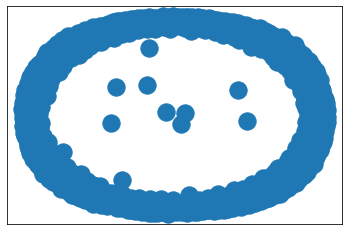

In [127]:
G = nx.Graph()
for index,row in df.iterrows():
    G.add_node(row["index"], pos=(row["lat"], row["long"]))
nx.draw_networkx(G, with_labels=False)

In [113]:
df1 = df[df['zipcode'].isin(["98103"])]
df2 = df[df['zipcode'].isin(["98038"])]

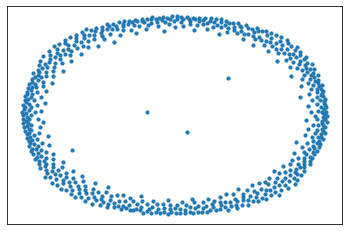

In [124]:
G = nx.Graph()
for index,row in df1.iterrows():
    G.add_node(row["index"], pos=(row["lat"], row["long"]))
nx.draw_networkx(G, with_labels=False, node_size=10)

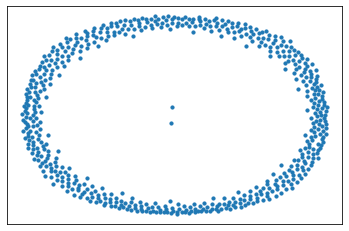

In [122]:
G = nx.Graph()
for index,row in df2.iterrows():
    G.add_node(row["index"], pos=(row["lat"], row["long"]))
nx.draw_networkx(G, with_labels=False, node_size=10)

Create edges based on a distance threshold delta, input given by user

In [128]:
from geopy.distance import distance

In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[]

Example of distance between two nodes

In [50]:
print(G.nodes[184])
print(G.nodes[437])
u_pos = G.nodes[184]['pos']
v_pos = G.nodes[437]['pos']
print(distance(u_pos, v_pos).km)

KeyError: 184

Create edges in the graph based on a distance threshold that is given by the user

das et al: ". For each edge eij ∈ E, its weight wij is calculated as wij = 1/δ(i,j),
where δ(i, j) represents the distance between the two nodes"

Need to add the weights to the edges if it's not already implicit to the code.

In [129]:
threshold = 0.5 # meters

# Loop over all pairs of nodes and add an edge if their distance is below the threshold
i = 1
for u, u_data in G.nodes(data=True):
    print(i)
    i += 1
    for v, v_data in G.nodes(data=True):
        if u < v:
            u_pos = u_data['pos']
            v_pos = v_data['pos']
            dist = distance(u_pos, v_pos).km
            if dist <= threshold:
                G.add_edge(u, v, weight=dist)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Example: The edges of the node index 182

In [52]:
print(G.edges(182))

NetworkXError: nbunch is not a node or a sequence of nodes.

Visualize the graph with edges (computationally heavy)

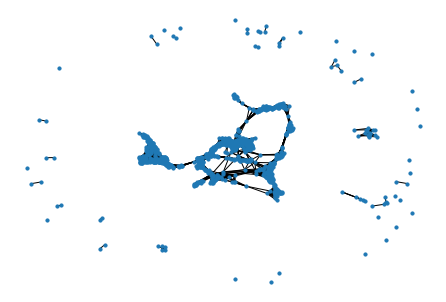

In [130]:
nx.draw(G, node_size=10)

## Create adjacency matrix

Graph needs to satisfy the following conditions
- It cannot have self-loops, in other words the diagonal of the adjacency matrix must contain zero values
- There cannot be any dangling nodes, every node needs to be connected in the graph, otherwise a network embedding cannot be created.

In [114]:
# Remove the self-loop edges that are presented in the graph
G.remove_edges_from(nx.selfloop_edges(G))

In [55]:
import scipy as sp

In [ ]:
!pip install 'networkx<2.7'

!pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Remove dangling nodes in the graph

In [115]:
# # Check for dangling nodes
# has_dangling_nodes = sp.linalg.norm(sp.sparse.csr_matrix.sum(A, axis=1) - 1) > 1e-10

# if has_dangling_nodes:
#     print('The graph has dangling nodes')
#     dangling_nodes = [node for node in G.nodes() if not G.degree[node] >0]
#     print(len(dangling_nodes))
#     G.remove_nodes_from(dangling_nodes)
# else:
#     print('The graph does not have dangling nodes')


dangling_nodes_orig = [node for node in G.nodes() if not G.degree[node] >0]
#dangling_nodes_orig = [node for node in G.nodes() if A.sum(0).A1 + A.sum(1).A1 == ]
print(dangling_nodes_orig)
G.remove_nodes_from(list(nx.isolates(G)))

[98.0, 199.0, 278.0, 443.0, 575.0, 1376.0, 2627.0, 3398.0, 4226.0, 4484.0, 6095.0, 8414.0, 8544.0, 9062.0, 10797.0, 11212.0, 11281.0, 11687.0, 13123.0, 13216.0, 15334.0, 15534.0, 18305.0, 18687.0, 19277.0]


In [88]:
print(len(dangling_nodes_orig))


25


In [116]:
dangling_nodes = [node['index'] for node in G.nodes() if not G.degree[node] >0]
print(len(dangling_nodes))
list = G.nodes()
print(list)

IndexError: invalid index to scalar variable.

In [117]:
A = nx.to_scipy_sparse_matrix(G).astype("float32")
A

<1192x1192 sparse matrix of type '<class 'numpy.float32'>'
	with 38074 stored elements in Compressed Sparse Row format>

Check for assertion that there are no dangling nodes, the below code should return an empty array

In [91]:
print(np.where(A.sum(0).A1 + A.sum(1).A1 == 0))

(array([], dtype=int64),)


In [92]:
print(df[df.index == 182])
print(df[df.index == 183])

Empty DataFrame
Columns: [id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15, year, month, day, index]
Index: []

[0 rows x 23 columns]
             id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
183  6661200320  163500.0  0.060606   0.176471     0.136364  0.004442     0.4   

     waterfront  view  condition  ...  yr_built  yr_renovated      lat  \
183         0.0   0.0        0.5  ...  0.834783           0.0  47.3848   

        long  sqft_living15  sqft_lot15  year     month       day  index  
183 -122.039       0.105263    0.010442   0.0  0.545455  0.733333    183  

[1 rows x 23 columns]


## Create the scipy sparse attribute matrix

In [118]:
mask = np.isin(df['index'], dangling_nodes_orig)
df = df[~mask]
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,index
9,3793500160,323000.0,0.090909,0.411765,0.309917,0.009483,0.4,0.0,0.0,0.50,...,0.895652,0.0,47.3684,-122.031,0.497076,0.028580,1.0,0.181818,0.366667,9
17,6865200140,485000.0,0.121212,0.058824,0.250000,0.005856,0.2,0.0,0.0,0.75,...,0.139130,0.0,47.6648,-122.343,0.269006,0.014299,0.0,0.363636,0.933333,17
73,5416510140,360000.0,0.121212,0.411765,0.411157,0.006979,0.4,0.0,0.0,0.50,...,0.913043,0.0,47.3608,-122.036,0.505848,0.017356,0.0,0.545455,0.300000,73
80,5104520400,390000.0,0.090909,0.411765,0.404959,0.007140,0.4,0.0,0.0,0.50,...,0.895652,0.0,47.3512,-122.008,0.485380,0.018941,0.0,1.000000,0.033333,80
81,7437100340,360000.0,0.121212,0.411765,0.311983,0.008406,0.4,0.0,0.0,0.50,...,0.800000,0.0,47.3490,-122.031,0.345029,0.023492,0.0,1.000000,0.700000,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,1931300090,610950.0,0.090909,0.529412,0.266529,0.001475,0.8,0.0,0.0,0.50,...,0.991304,0.0,47.6572,-122.346,0.277778,0.016483,0.0,0.363636,0.200000,21574
21589,7570050450,347500.0,0.090909,0.411765,0.444215,0.006594,0.4,0.0,0.0,0.50,...,0.956522,0.0,47.3452,-122.022,0.540936,0.015482,0.0,0.727273,0.300000,21589
21592,1931300412,475000.0,0.090909,0.352941,0.165289,0.000881,0.8,0.0,0.0,0.50,...,0.939130,0.0,47.6542,-122.346,0.143275,0.000865,1.0,0.272727,0.500000,21592
21595,1972201967,520000.0,0.060606,0.352941,0.235537,0.000530,0.8,0.0,0.0,0.50,...,0.921739,0.0,47.6533,-122.346,0.245614,0.001118,0.0,0.818182,1.000000,21595


Save the above dataframe to benchmark the ML models with network embeddings against utilizing these raw features

In [94]:
df.to_csv("BaseKC_data.csv", index=False)

Create a separate dataframe consisting of the prices

In [119]:
labels = df["price"]
labels

9        323000.0
17       485000.0
73       360000.0
80       390000.0
81       360000.0
           ...   
21574    610950.0
21589    347500.0
21592    475000.0
21595    520000.0
21608    360000.0
Name: price, Length: 1167, dtype: float64

Drop all the variables that are not features of houses

In [96]:
df.drop(["id", "index", "price", "lat", "long"], axis=1, inplace=True)
df.head()

c:\Users\nino\anaconda4\envs\myenv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
9,0.090909,0.411765,0.309917,0.009483,0.4,0.0,0.0,0.50,0.333333,0.309917,0.0,0.895652,0.0,0.497076,0.028580,1.0,0.181818,0.366667
17,0.121212,0.058824,0.250000,0.005856,0.2,0.0,0.0,0.75,0.333333,0.250000,0.0,0.139130,0.0,0.269006,0.014299,0.0,0.363636,0.933333
73,0.121212,0.411765,0.411157,0.006979,0.4,0.0,0.0,0.50,0.500000,0.411157,0.0,0.913043,0.0,0.505848,0.017356,0.0,0.545455,0.300000
80,0.090909,0.411765,0.404959,0.007140,0.4,0.0,0.0,0.50,0.500000,0.404959,0.0,0.895652,0.0,0.485380,0.018941,0.0,1.000000,0.033333
81,0.121212,0.411765,0.311983,0.008406,0.4,0.0,0.0,0.50,0.333333,0.311983,0.0,0.800000,0.0,0.345029,0.023492,0.0,1.000000,0.700000


Convert the dataframe into an attribute matrix in the required format

In [97]:
df_numpy = df.to_numpy()
attr_matrix = csr_matrix(df_numpy).astype("float32")
attr_matrix

<1167x18 sparse matrix of type '<class 'numpy.float32'>'
	with 15493 stored elements in Compressed Sparse Row format>

## Save graph as npz file

The code of das et al includes labels if it's present, if it's not then label is set to "None". 

Price is given separately in the code, need to check

The npz file needs to follow below format strictly to be able to be used in network embedding models. 

TODO: Check formatting the data without edges and labels, they normally should not be necessary. The labels should also be equal to labels.

In [98]:
np.savez('C:/Users/nino/Desktop/Python/ThesisFinal/GLACE/data/cora_ml/FINALEDUMMYDATASET.npz', edges = G.edges, adj_data=A.data, adj_indices=A.indices, adj_indptr=A.indptr,
         adj_shape=A.shape, attr_data=attr_matrix.data, attr_indices=attr_matrix.indices, attr_indptr=attr_matrix.indptr,
         attr_shape=attr_matrix.shape, labels=labels)

In [68]:
import numpy as np
data = np.load('C:/Users/nino/Desktop/Python/ThesisFinal/GLACE/data/cora_ml/FINALEDUMMYDATASET.npz')

# Print the keys in the file
print('Keys in the file:', data.keys())

# Print the values for each key
for key in data.keys():
    print('Data for key', key)
    print(data[key])

Keys in the file: KeysView(<numpy.lib.npyio.NpzFile object at 0x000001C5F695FCC0>)
Data for key edges
[[9.0000e+00 7.3000e+01]
 [9.0000e+00 1.1200e+02]
 [9.0000e+00 1.8300e+02]
 ...
 [2.1574e+04 2.1592e+04]
 [2.1574e+04 2.1595e+04]
 [2.1592e+04 2.1595e+04]]
Data for key adj_data
[0.9255219 0.6670678 1.9208103 ... 0.989541  1.3847716 0.992384 ]
Data for key adj_indices
[   2    7   12 ... 1175 1177 1179]
Data for key adj_indptr
[     0    303    627 ... 292938 293187 293468]
Data for key adj_shape
[1192 1192]
Data for key attr_data
[0.09090909 0.4117647  0.30991736 ... 0.00210945 0.36363637 0.6666667 ]
Data for key attr_indices
[ 0  1  2 ... 14 16 17]
Data for key attr_indptr
[    0    14    27 ... 15799 15813 15826]
Data for key attr_shape
[1192   18]
Data for key labels
[323000. 485000. 360000. ... 475000. 520000. 360000.]


## Save csv file with property prices (target variable)

In [120]:
price_file = pd.DataFrame(labels)
price_file["id"] = price_file.index

In [121]:
price_file = price_file.rename(columns={"Unnamed: 0": "id"})

In [122]:
price_file

,price,id
9,323000.0,9
17,485000.0,17
73,360000.0,73
80,390000.0,80
81,360000.0,81
...,...,...
21574,610950.0,21574
21589,347500.0,21589
21592,475000.0,21592
21595,520000.0,21595


In [123]:
price_file.to_csv("price_label.csv", index=False)

## School Data

In [131]:
school_df = pd.read_csv("kc_school_data.csv")

In [132]:
school_df.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR
0,-122.190071,47.258406,1,10000066,1340665.0,660,School-Elementary,Bowman Creek Elementary School,Bowman Creek,5701 Kersey Way SE,98092,-122.190075,47.258404,0.0,10,AUBURN,3221059058,322105,9058
1,-122.176312,47.610853,2,10000076,1258412.0,660,School-Elementary,Wilburton Elementary,Wilburton,12300 Main St,98005,-122.176314,47.610851,0.0,10,BELLEVUE,3325059019,332505,9019
2,-122.299211,47.477355,3,10000077,751890.0,661,School-Junior High/Middle,Glacier Middle School,Glacier,2450 S 142nd St,98168,-122.299213,47.477353,0.0,10,HIGHLINE,3598600006,359860,6
3,-122.170580,47.604033,4,2156,83.0,664,School-Alternative,International School,International,445 128th Ave SE,98005,-122.170582,47.604031,3522.0,10,BELLEVUE,3325059117,332505,9117
4,-122.284831,47.634078,5,940,426089.0,660,School-Elementary,McGilvra Elementary School,McGilvra,1617 38th Ave E,98112,-122.284833,47.634076,2201.0,10,SEATTLE,5318100820,531810,820


In [7]:
school_df.shape

(655, 19)

In [133]:
zip_values = ['98103', '98038']
school_df = school_df[school_df['ZIPCODE'].isin(zip_values)]
school_df.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,FEATUREDES,NAME,ABB_NAME,ADDRESS,ZIPCODE,LONG_CEN,LAT_CEN,OSPI_CODE,SCH_CLASS,DISTRICT,PIN,MAJOR,MINOR
28,-122.339785,47.664820,29,6600649,841015.0,664,School-Alternative,Seattle Waldorf School - Kinderhaus Campus,Waldorf Kindergarten,4919 Woodlawn Ave N,98103,-122.339786,47.664818,0.0,20,SEATTLE,6865200005,686520,5
70,-122.051551,47.398279,71,520,620598.0,660,School-Elementary,Cedar River Elementary School,Cedar River,22615 Sweeney Rd SE,98038,-122.051554,47.398277,3937.0,10,TAHOMA,1622069134,162206,9134
103,-122.339898,47.659919,104,10001710,NaN,662,School-High,Lincoln High School,Lincoln,4400 Interlake Ave N,98103,-122.339899,47.659918,0.0,10,SEATTLE,7821200700,782120,700
107,-122.356975,47.686410,108,855,12397.0,664,School-Alternative,St. John Catholic School,St. John,120 N 79th St,98103,-122.356976,47.686408,0.0,20,SEATTLE,1646501150,164650,1150
142,-122.339894,47.659921,143,6600701,746393.0,664,School-Alternative,Cascadia Elementary School,Cascadia,4400 Interlake Ave N,98103,-122.339896,47.659920,NaN,10,SEATTLE,7821200700,782120,700


In [134]:
import geopy
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import node_classification
from networkx.algorithms.community.centrality import girvan_newman

In [136]:
school_df["index"] = school_df.index

In [137]:
G_schools = nx.Graph()
for index,row in school_df.iterrows():
    G_schools.add_node(row["index"], pos=(row["LAT_CEN"], row["LONG_CEN"]))


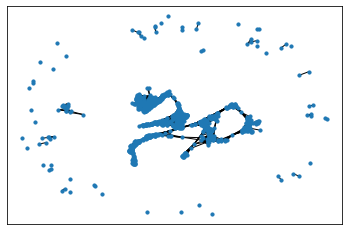

In [138]:
nx.draw_networkx(G, with_labels=False, node_size=10)

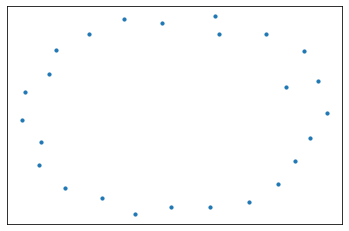

In [139]:
nx.draw_networkx(G_schools, with_labels=False, node_size=10)

In [15]:
from geopy.distance import distance

In [152]:
# create a new graph for the heterogeneous graph
G_het = nx.Graph()

# add house and school nodes to the heterogeneous graph
for u, u_data in G.nodes(data=True):
    G_het.add_node(u, **u_data)
for u, u_data in G_schools.nodes(data=True):
    G_het.add_node(u, **u_data)

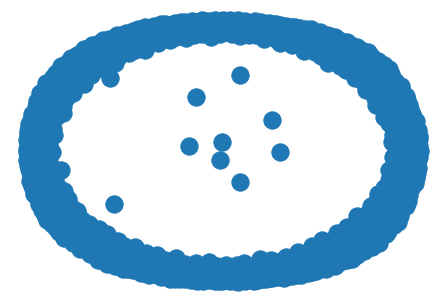

In [141]:
nx.draw(G_het)

In [153]:
threshold = 2 # meters
for u, u_data in G.nodes(data=True):
    for v, v_data in G_schools.nodes(data=True):
        u_pos = u_data['pos']
        v_pos = v_data['pos']
        dist = distance(u_pos, v_pos).km
        if dist <= threshold:
            G_het.add_edge(u, v, weight=dist)

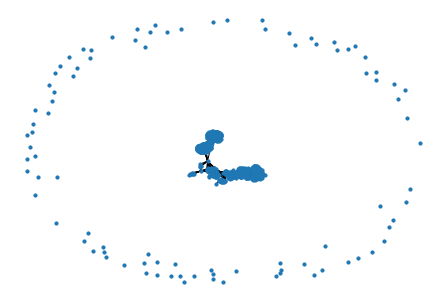

In [154]:
nx.draw(G_het, node_size=10)

Check the amount of houses that are not connected with schools

In [161]:
len(G_het.nodes())

1216

In [163]:
dangling_nodes = list(nx.isolates(G_het))
len(dangling_nodes)

92

In [61]:
G_schools.nodes()

NodeView((28, 70, 103, 107, 142, 143, 146, 155, 156, 166, 167, 191, 282, 293, 300, 304, 311, 329, 408, 432, 454, 455, 568, 579, 648))

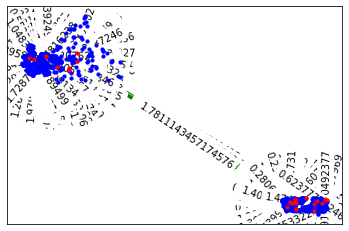

In [167]:
pos = nx.get_node_attributes(G_het, 'pos')
edge_labels = nx.get_edge_attributes(G_het, 'weight')
nx.draw_networkx_nodes(G_het, pos, nodelist=G.nodes(), node_color='blue', node_size=10)
nx.draw_networkx_nodes(G_het, pos, nodelist=G_schools.nodes(), node_color='red', node_size=10)
nx.draw_networkx_edges(G_het, pos, edgelist=G_het.edges(), edge_color='green')
nx.draw_networkx_edge_labels(G_het, pos, edge_labels=edge_labels)
plt.axis()
plt.show()